TO calculate any Cross Entory use Ln() not log()      

np. argsmax() - Finds the greates number in array & returns its index, dependes on axis - 0 or 1. 
1. 0 along y axis - up arrow
2. 1 along x axis - right arrow
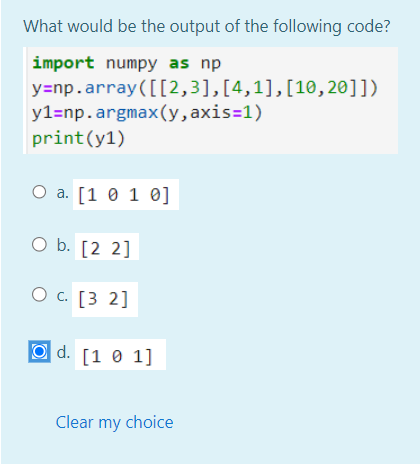

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Lab/Exp 2/customers.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# Pre Processing

In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.shape

(10695, 11)

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

In [ ]:
df_cleaned = df.dropna(axis=0)

In [ ]:
df_cleaned.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [ ]:
df_cleaned.shape

(8896, 9)

In [ ]:
df_cleaned.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

# Encoding

In [ ]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_cleaned['Ever_Married'].unique()  

array(['No', 'Yes'], dtype=object)

In [ ]:
df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
df_cleaned['Segmentation'].unique()  

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
categories_list=[['Male', 'Female'],
                 ['No', 'Yes'],
                 ['No', 'Yes'],
                 ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
                  'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]

enc = OrdinalEncoder(categories=categories_list)

In [ ]:
df1 = df_cleaned.copy()

df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender','Ever_Married',
                                                  'Graduated','Profession',
                                                  'Spending_Score']])
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,D
2,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,B
3,0.0,1.0,67,1.0,2.0,0.0,2.0,2.0,B
5,0.0,1.0,56,0.0,3.0,0.0,1.0,2.0,C
6,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,C
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,D
10690,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,B
10691,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,A
10693,0.0,1.0,47,1.0,8.0,1.0,2.0,5.0,C


In [ ]:
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [ ]:
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,3
2,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,1
3,0.0,1.0,67,1.0,2.0,0.0,2.0,2.0,1
5,0.0,1.0,56,0.0,3.0,0.0,1.0,2.0,2
6,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,2
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,3
10690,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,1
10691,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,0
10693,0.0,1.0,47,1.0,8.0,1.0,2.0,5.0,2


# Visualization

<Axes: >

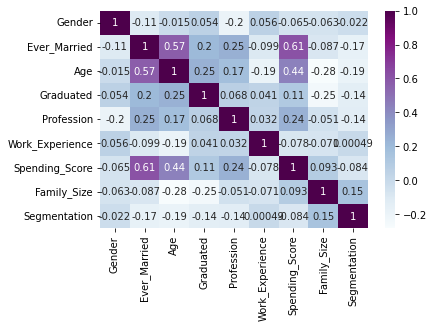

In [ ]:
corr = df1.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)

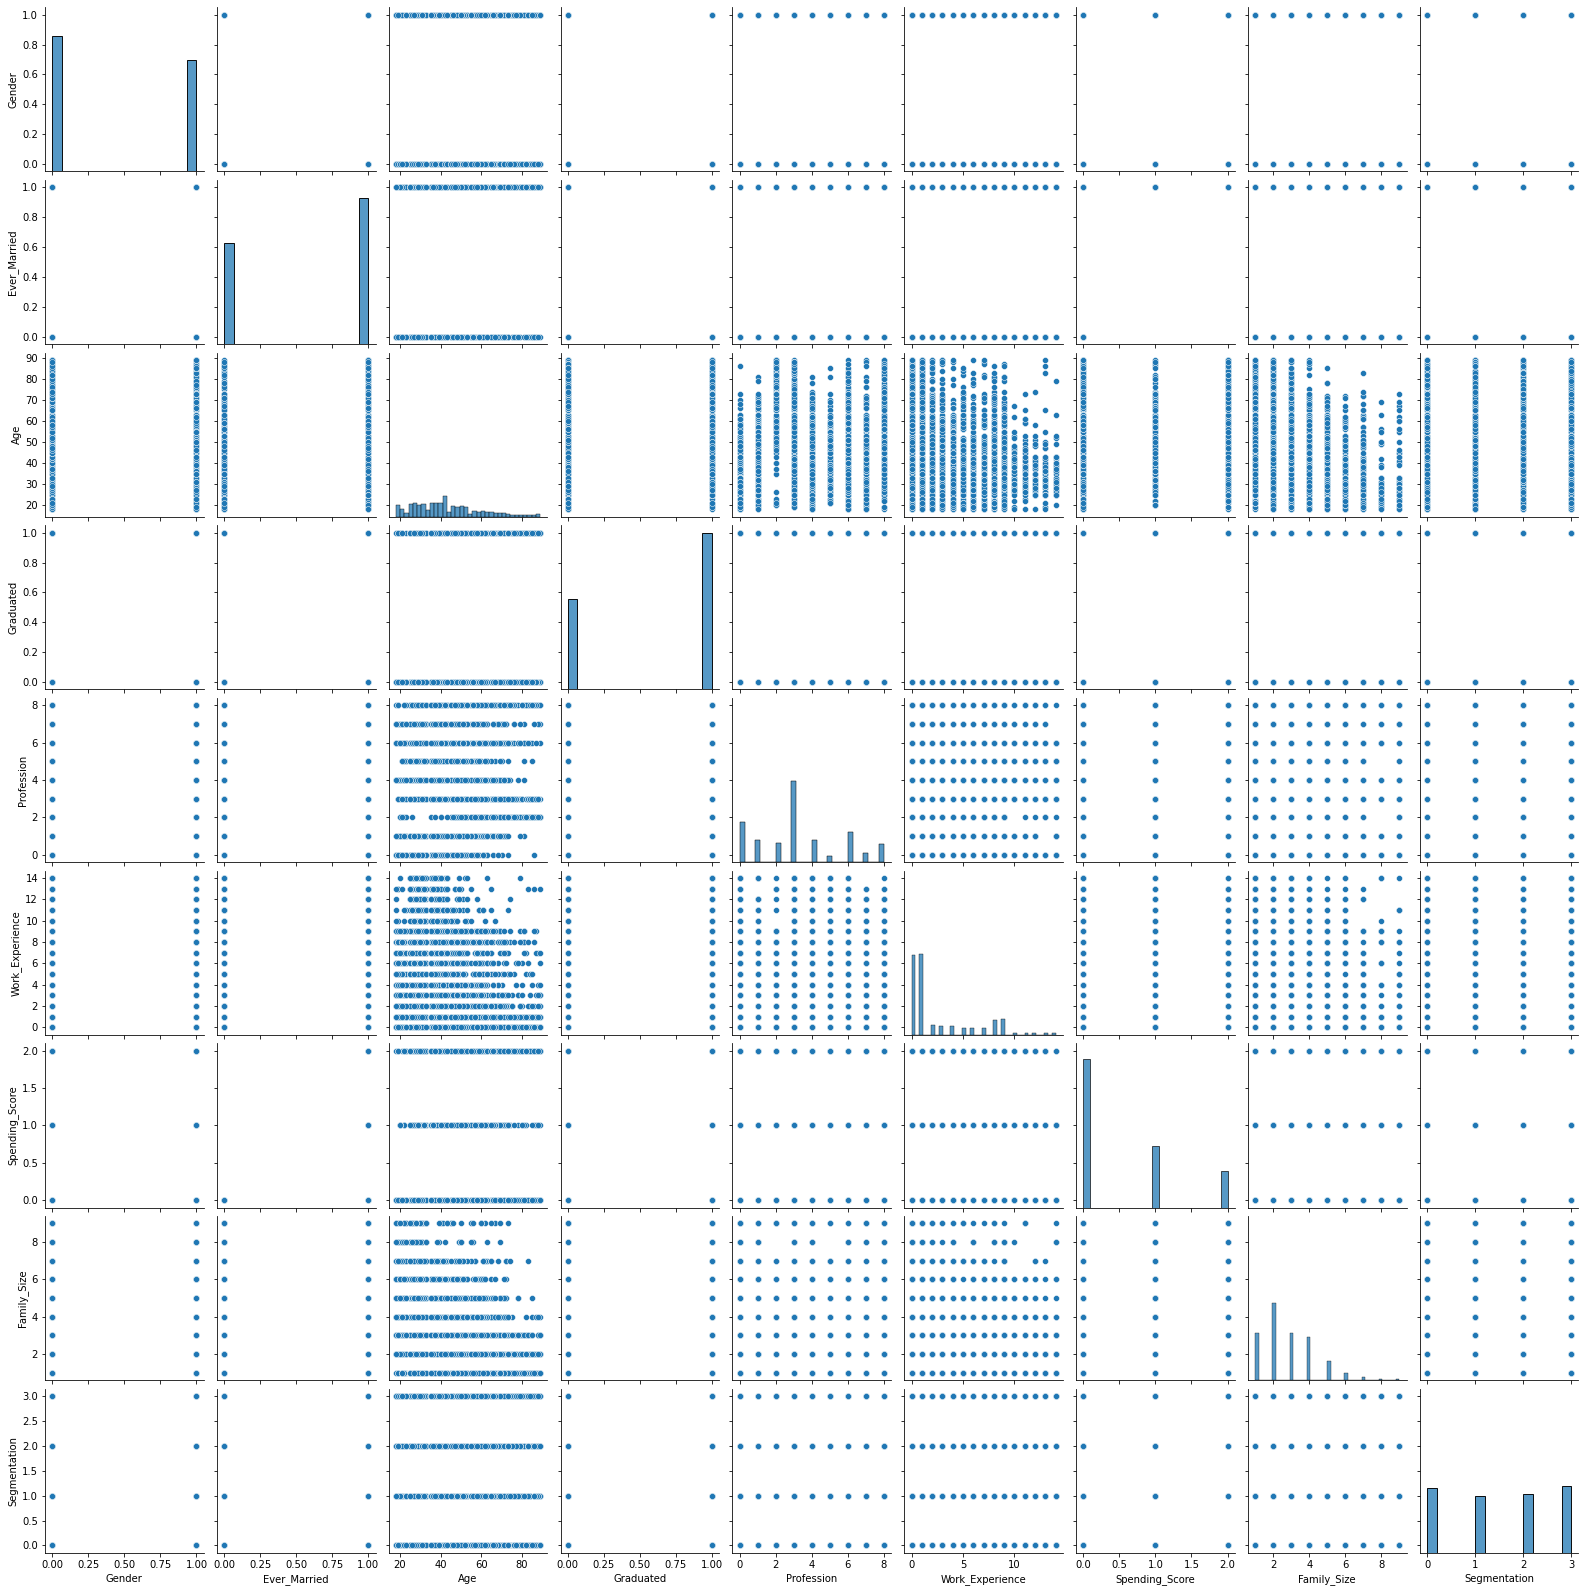

In [ ]:
sns.pairplot(df1)

<ipython-input-26-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

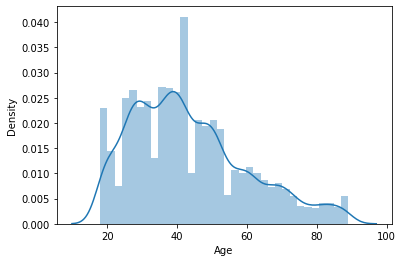

In [ ]:
sns.distplot(df1['Age'])

<Axes: ylabel='count'>

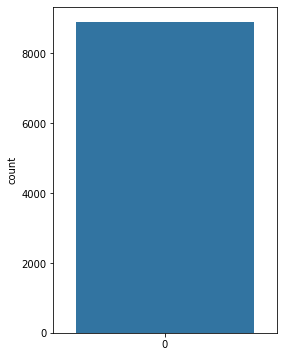

In [ ]:
plt.figure(figsize=(4,6))
sns.countplot(df1['Family_Size'])

<Axes: xlabel='Family_Size', ylabel='Age'>

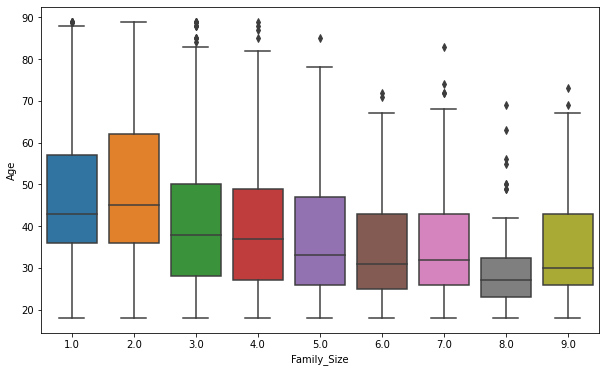

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=df1)

<Axes: xlabel='Family_Size', ylabel='Spending_Score'>

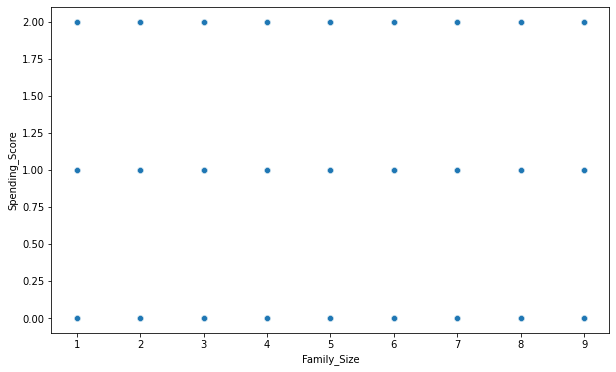

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=df1)

<Axes: xlabel='Family_Size', ylabel='Age'>

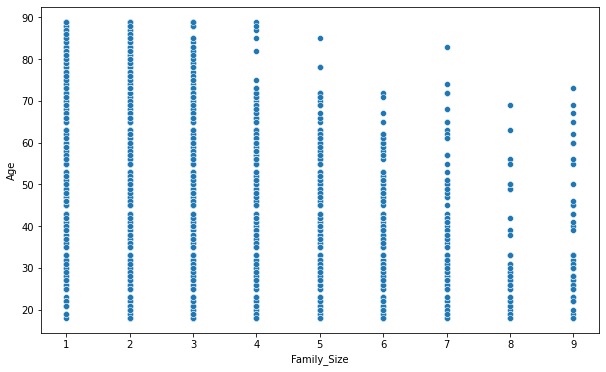

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=df1)

# Assign X and Y

In [ ]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,43.501124,0.633543,3.284735,2.612747,0.545414,2.841165,1.518660
std,0.497497,0.491605,16.571877,0.481863,2.346963,3.391636,0.738536,1.533532,1.146635
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]]) # Fetching Age column alone
df1[["Age"]] = scale.transform(df1[["Age"]])

In [ ]:
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,0.056338,0.0,0.0,1.0,0.0,4.0,3
2,1.0,1.0,0.690141,1.0,1.0,1.0,0.0,1.0,1
3,0.0,1.0,0.690141,1.0,2.0,0.0,2.0,2.0,1
5,0.0,1.0,0.535211,0.0,3.0,0.0,1.0,2.0,2
6,0.0,0.0,0.197183,1.0,0.0,1.0,0.0,3.0,2
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,0.239437,1.0,6.0,1.0,0.0,2.0,3
10690,0.0,0.0,0.154930,0.0,0.0,9.0,0.0,4.0,1
10691,1.0,0.0,0.239437,1.0,4.0,1.0,0.0,1.0,0
10693,0.0,1.0,0.408451,1.0,8.0,1.0,2.0,5.0,2


In [ ]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165,1.518660
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532,1.146635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:
df1['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
x = df1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y1 = df1[['Segmentation']].values

In [ ]:
x

array([[0.        , 0.        , 0.05633803, ..., 1.        , 0.        ,
        4.        ],
       [1.        , 1.        , 0.69014085, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.69014085, ..., 0.        , 2.        ,
        2.        ],
       ...,
       [1.        , 0.        , 0.23943662, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.4084507 , ..., 1.        , 2.        ,
        5.        ],
       [1.        , 0.        , 0.35211268, ..., 9.        , 0.        ,
        3.        ]])

In [ ]:
ohe = OneHotEncoder()
ohe.fit(y1)
y1.shape

(8896, 1)

In [ ]:
y = ohe.transform(y1).toarray()
y.shape

(8896, 4)

In [ ]:
y

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [ ]:
y1[0]

array([3])

In [ ]:
y[0]

array([0., 0., 0., 1.])

In [ ]:
x.shape

(8896, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)

# Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ai = Sequential([Dense(50,input_shape = [8]),
                 Dense(40,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu")
                 Dense(4,activation="softmax")])

SyntaxError: ignored

In [ ]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max', 
    verbose=1, 
    patience=20)

In [ ]:
ai.fit(x = x_train, y = y_train,
             epochs=500, batch_size=256,
             validation_data=(x_test,y_test),
             callbacks = [early_stop]
             )

Epoch 1/500
24/24 [==============================] - 0s 9ms/step - loss: 1.1909 - accuracy: 0.4702 - val_loss: 1.1934 - val_accuracy: 0.4656
Epoch 2/500
24/24 [==============================] - 0s 7ms/step - loss: 1.1922 - accuracy: 0.4690 - val_loss: 1.2017 - val_accuracy: 0.4730
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 1.1902 - accuracy: 0.4739 - val_loss: 1.2015 - val_accuracy: 0.4525
Epoch 4/500
24/24 [==============================] - 0s 8ms/step - loss: 1.1880 - accuracy: 0.4740 - val_loss: 1.1887 - val_accuracy: 0.4740
Epoch 5/500
24/24 [==============================] - 0s 7ms/step - loss: 1.1859 - accuracy: 0.4799 - val_loss: 1.1856 - val_accuracy: 0.4693
Epoch 6/500
24/24 [==============================] - 0s 8ms/step - loss: 1.1799 - accuracy: 0.4850 - val_loss: 1.1879 - val_accuracy: 0.4717
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 1.1810 - accuracy: 0.4740 - val_loss: 1.1877 - val_accuracy: 0.4720
Epoch 8/500
2

# Analyzing Model - Accuracy

In [ ]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.190897,0.470152,1.193391,0.465610
1,1.192167,0.468971,1.201713,0.473028
2,1.190231,0.473862,1.201510,0.452461
3,1.187967,0.474030,1.188663,0.474039
4,1.185894,0.479933,1.185595,0.469319


<Axes: >

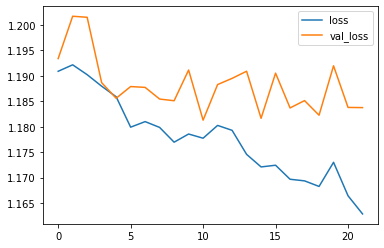

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

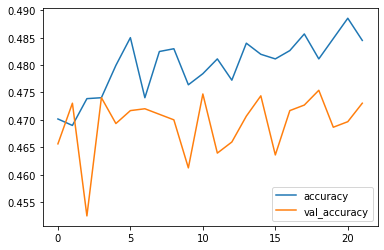

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

93/93 [==============================] - 0s 3ms/step


(2966,)

In [ ]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [ ]:
conf(y_truevalue,x_pred)

array([[298, 131, 126, 224],
       [191, 150, 216, 112],
       [103, 127, 395, 106],
       [125,  47,  55, 560]])

In [ ]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40       779
           1       0.33      0.22      0.27       669
           2       0.50      0.54      0.52       731
           3       0.56      0.71      0.63       787

    accuracy                           0.47      2966
   macro avg       0.45      0.46      0.45      2966
weighted avg       0.45      0.47      0.46      2966



# Saving Model

In [ ]:
import pickle

# Saving the Model
ai.save('customer_classification_model.h5')
     
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le], fh)
     
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')
     
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le]=pickle.load(fh)

# Analyzing Model - Accuracy - BEST

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ai = Sequential([Dense(50,input_shape = [8]),
                 Dense(40,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu"),
                 Dense(4,activation="softmax")])

In [ ]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max', 
    verbose=1, 
    patience=20)

In [ ]:
ai.fit(x = x_train, y = y_train,
             epochs=500, batch_size=256,
             validation_data=(x_test,y_test),
             callbacks = [early_stop]
             )

Epoch 1/500
24/24 [==============================] - 1s 13ms/step - loss: 1.3814 - accuracy: 0.3189 - val_loss: 1.3323 - val_accuracy: 0.3982
Epoch 2/500
24/24 [==============================] - 0s 6ms/step - loss: 1.3208 - accuracy: 0.3788 - val_loss: 1.2919 - val_accuracy: 0.4056
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2888 - accuracy: 0.4022 - val_loss: 1.2655 - val_accuracy: 0.4285
Epoch 4/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2679 - accuracy: 0.4192 - val_loss: 1.2478 - val_accuracy: 0.4302
Epoch 5/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2529 - accuracy: 0.4283 - val_loss: 1.2364 - val_accuracy: 0.4420
Epoch 6/500
24/24 [==============================] - 0s 7ms/step - loss: 1.2391 - accuracy: 0.4403 - val_loss: 1.2272 - val_accuracy: 0.4558
Epoch 7/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2335 - accuracy: 0.4391 - val_loss: 1.2277 - val_accuracy: 0.4579
Epoch 8/500


In [ ]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.381433,0.318887,1.332304,0.398179
1,1.320753,0.378752,1.291877,0.405597
2,1.288805,0.402192,1.265458,0.428523
3,1.267874,0.419224,1.247835,0.430209
4,1.252913,0.428331,1.236375,0.442009


<Axes: >

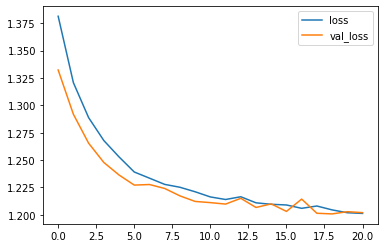

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

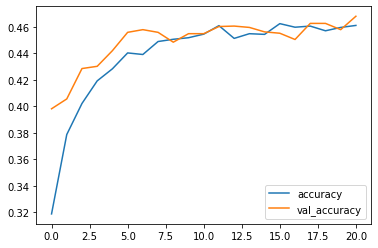

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

93/93 [==============================] - 0s 2ms/step


(2966,)

In [ ]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [ ]:
conf(y_truevalue,x_pred)

array([[401,  87, 124, 167],
       [262, 106, 218,  83],
       [154,  85, 407,  85],
       [218,  42,  53, 474]])

In [ ]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.39      0.51      0.44       779
           1       0.33      0.16      0.21       669
           2       0.51      0.56      0.53       731
           3       0.59      0.60      0.59       787

    accuracy                           0.47      2966
   macro avg       0.45      0.46      0.45      2966
weighted avg       0.46      0.47      0.45      2966



# Prediction

In [ ]:
x_prediction = np.argmax(ai.predict(x_test[1:2,:]), axis=1)

print(x_prediction)

print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 42ms/step
[1]
['B']
